Importing  Libraries

In [301]:
import pandas as pd
import numpy as np
import  random as rnd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from sklearn.linear_model import SGDRegressor
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn import linear_model
from sklearn import svm



Loading the data set

In [247]:
movie_data = pd.read_csv('/content/IMDb Movies India.csv', encoding= 'ISO-8859-1')

In [248]:
movie_data.head()

,Name,Year,Duration,Genre,Rating,Votes,Director,Actor 1,Actor 2,Actor 3
0,,NaN,NaN,Drama,NaN,NaN,J.S. Randhawa,Manmauji,Birbal,Rajendra Bhatia
1,#Gadhvi (He thought he was Gandhi),(2019),109 min,Drama,7.0,8,Gaurav Bakshi,Rasika Dugal,Vivek Ghamande,Arvind Jangid
2,#Homecoming,(2021),90 min,"Drama, Musical",NaN,NaN,Soumyajit Majumdar,Sayani Gupta,Plabita Borthakur,Roy Angana
3,#Yaaram,(2019),110 min,"Comedy, Romance",4.4,35,Ovais Khan,Prateik,Ishita Raj,Siddhant Kapoor
4,...And Once Again,(2010),105 min,Drama,NaN,NaN,Amol Palekar,Rajat Kapoor,Rituparna Sengupta,Antara Mali


Data processing:

In [249]:
def movie_dataoveriew(movie_data, response):
  print(f'{response}:\n')
  print("Rows:",movie_data.shape[0])
  print("\n Number of features:",movie_data.shape[1])
  print("\nFeatures:")
  print(movie_data.columns.tolist())
  print("\nMissing values:",movie_data.isnull().sum().values.sum())
  print("\nUnique values:")
  print(movie_data.nunique())

In [250]:
movie_dataoveriew(movie_data, 'Overiew of the training dataset')

Overiew of the training dataset:

Rows: 15509

 Number of features: 10

Features:
['Name', 'Year', 'Duration', 'Genre', 'Rating', 'Votes', 'Director', 'Actor 1', 'Actor 2', 'Actor 3']

Missing values: 33523

Unique values:
Name        13838
Year          102
Duration      182
Genre         485
Rating         84
Votes        2034
Director     5938
Actor 1      4718
Actor 2      4891
Actor 3      4820
dtype: int64


In [252]:
movie_data.isna().sum()

Name           0
Year         528
Duration    8269
Genre       1877
Rating      7590
Votes       7589
Director     525
Actor 1     1617
Actor 2     2384
Actor 3     3144
dtype: int64

In [253]:
movie_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15509 entries, 0 to 15508
Data columns (total 10 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Name      15509 non-null  object 
 1   Year      14981 non-null  object 
 2   Duration  7240 non-null   object 
 3   Genre     13632 non-null  object 
 4   Rating    7919 non-null   float64
 5   Votes     7920 non-null   object 
 6   Director  14984 non-null  object 
 7   Actor 1   13892 non-null  object 
 8   Actor 2   13125 non-null  object 
 9   Actor 3   12365 non-null  object 
dtypes: float64(1), object(9)
memory usage: 1.2+ MB


In [254]:
movie_data['Genre'].value_counts()

Drama                         2780
Action                        1289
Thriller                       779
Romance                        708
Drama, Romance                 524
                              ... 
Action, Musical, War             1
Horror, Crime, Thriller          1
Animation, Comedy                1
Romance, Action, Crime           1
Adventure, Fantasy, Sci-Fi       1
Name: Genre, Length: 485, dtype: int64

In [255]:
movie_data['Director'].value_counts()

Jayant Desai        58
Kanti Shah          57
Babubhai Mistry     50
Mahesh Bhatt        48
Master Bhagwan      47
                    ..
Naeem Siddiqui       1
Shadaab Khan         1
Mystelle Brabbee     1
Kunal Shivdasani     1
Kiran Thej           1
Name: Director, Length: 5938, dtype: int64

In [256]:
movie_data['Actor 1'].value_counts()

Ashok Kumar           158
Dharmendra            140
Jeetendra             140
Mithun Chakraborty    133
Amitabh Bachchan      129
                     ... 
Vatsal Sheth            1
Ujala Baboria           1
Dimple Sewak            1
Komal Leels             1
Sangeeta Tiwari         1
Name: Actor 1, Length: 4718, dtype: int64

In [257]:
movie_data.head(10)

,Name,Year,Duration,Genre,Rating,Votes,Director,Actor 1,Actor 2,Actor 3
0,,NaN,NaN,Drama,NaN,NaN,J.S. Randhawa,Manmauji,Birbal,Rajendra Bhatia
1,#Gadhvi (He thought he was Gandhi),(2019),109 min,Drama,7.0,8,Gaurav Bakshi,Rasika Dugal,Vivek Ghamande,Arvind Jangid
2,#Homecoming,(2021),90 min,"Drama, Musical",NaN,NaN,Soumyajit Majumdar,Sayani Gupta,Plabita Borthakur,Roy Angana
3,#Yaaram,(2019),110 min,"Comedy, Romance",4.4,35,Ovais Khan,Prateik,Ishita Raj,Siddhant Kapoor
4,...And Once Again,(2010),105 min,Drama,NaN,NaN,Amol Palekar,Rajat Kapoor,Rituparna Sengupta,Antara Mali
5,...Aur Pyaar Ho Gaya,(1997),147 min,"Comedy, Drama, Musical",4.7,827,Rahul Rawail,Bobby Deol,Aishwarya Rai Bachchan,Shammi Kapoor
6,...Yahaan,(2005),142 min,"Drama, Romance, War",7.4,"1,086",Shoojit Sircar,Jimmy Sheirgill,Minissha Lamba,Yashpal Sharma
7,.in for Motion,(2008),59 min,Documentary,NaN,NaN,Anirban Datta,NaN,NaN,NaN
8,?: A Question Mark,(2012),82 min,"Horror, Mystery, Thriller",5.6,326,Allyson Patel,Yash Dave,Muntazir Ahmad,Kiran Bhatia
9,@Andheri,(2014),116 min,"Action, Crime, Thriller",4.0,11,Biju Bhaskar Nair,Augustine,Fathima Babu,Byon


In [258]:
movie_data.dropna(subset=['Name', 'Year', 'Duration', 'Votes', 'Rating'], inplace=True)
movie_data.isna().sum()

Name          0
Year          0
Duration      0
Genre        31
Rating        0
Votes         0
Director      1
Actor 1      75
Actor 2     117
Actor 3     163
dtype: int64

In [259]:
movie_data.head()

,Name,Year,Duration,Genre,Rating,Votes,Director,Actor 1,Actor 2,Actor 3
1,#Gadhvi (He thought he was Gandhi),(2019),109 min,Drama,7.0,8,Gaurav Bakshi,Rasika Dugal,Vivek Ghamande,Arvind Jangid
3,#Yaaram,(2019),110 min,"Comedy, Romance",4.4,35,Ovais Khan,Prateik,Ishita Raj,Siddhant Kapoor
5,...Aur Pyaar Ho Gaya,(1997),147 min,"Comedy, Drama, Musical",4.7,827,Rahul Rawail,Bobby Deol,Aishwarya Rai Bachchan,Shammi Kapoor
6,...Yahaan,(2005),142 min,"Drama, Romance, War",7.4,"1,086",Shoojit Sircar,Jimmy Sheirgill,Minissha Lamba,Yashpal Sharma
8,?: A Question Mark,(2012),82 min,"Horror, Mystery, Thriller",5.6,326,Allyson Patel,Yash Dave,Muntazir Ahmad,Kiran Bhatia


In [260]:
movie_dataoveriew(movie_data,'overiew of the training dataset')

overiew of the training dataset:

Rows: 5851

 Number of features: 10

Features:
['Name', 'Year', 'Duration', 'Genre', 'Rating', 'Votes', 'Director', 'Actor 1', 'Actor 2', 'Actor 3']

Missing values: 387

Unique values:
Name        5570
Year          91
Duration     178
Genre        393
Rating        83
Votes       2030
Director    2549
Actor 1     2046
Actor 2     2373
Actor 3     2572
dtype: int64


In [261]:
movie_data['Year'] = movie_data['Year'].str.strip('()').astype(int)

In [262]:
movie_data['Votes'] = movie_data['Votes'].str.replace(',','').astype(int)

In [263]:
movie_data['Duration'] = movie_data['Duration'].str.replace('min','').astype(int)

In [264]:
movie_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5851 entries, 1 to 15508
Data columns (total 10 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Name      5851 non-null   object 
 1   Year      5851 non-null   int64  
 2   Duration  5851 non-null   int64  
 3   Genre     5820 non-null   object 
 4   Rating    5851 non-null   float64
 5   Votes     5851 non-null   int64  
 6   Director  5850 non-null   object 
 7   Actor 1   5776 non-null   object 
 8   Actor 2   5734 non-null   object 
 9   Actor 3   5688 non-null   object 
dtypes: float64(1), int64(3), object(6)
memory usage: 502.8+ KB


In [265]:
movie_data.describe()

,Year,Duration,Rating,Votes
count,5851.000000,5851.000000,5851.000000,5851.000000
mean,1996.416852,132.294480,5.931875,2611.273116
std,19.914640,26.555826,1.389942,13433.828528
min,1931.000000,21.000000,1.100000,5.000000
25%,1983.000000,117.000000,5.000000,28.000000
50%,2002.000000,134.000000,6.100000,119.000000
75%,2013.000000,150.000000,7.000000,862.500000
max,2021.000000,321.000000,10.000000,591417.000000


In [266]:
movie_data.drop('Genre', axis = 1, inplace= True)

In [267]:
movie_data.head()

,Name,Year,Duration,Rating,Votes,Director,Actor 1,Actor 2,Actor 3
1,#Gadhvi (He thought he was Gandhi),2019,109,7.0,8,Gaurav Bakshi,Rasika Dugal,Vivek Ghamande,Arvind Jangid
3,#Yaaram,2019,110,4.4,35,Ovais Khan,Prateik,Ishita Raj,Siddhant Kapoor
5,...Aur Pyaar Ho Gaya,1997,147,4.7,827,Rahul Rawail,Bobby Deol,Aishwarya Rai Bachchan,Shammi Kapoor
6,...Yahaan,2005,142,7.4,1086,Shoojit Sircar,Jimmy Sheirgill,Minissha Lamba,Yashpal Sharma
8,?: A Question Mark,2012,82,5.6,326,Allyson Patel,Yash Dave,Muntazir Ahmad,Kiran Bhatia


Data Analysing

In [268]:
plt.figure(figsize = (14,7))

<Figure size 1400x700 with 0 Axes>

<Figure size 1400x700 with 0 Axes>

<Axes: xlabel='Votes'>

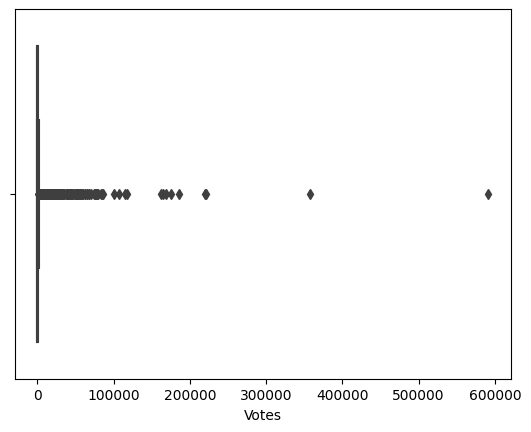

In [269]:
plt.subplot(1,1,1)
sns.boxplot(x='Votes', data=movie_data)

<ipython-input-270-2532958dbb73>:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(movie_data['Year'],color='r')


<Axes: xlabel='Year', ylabel='Density'>

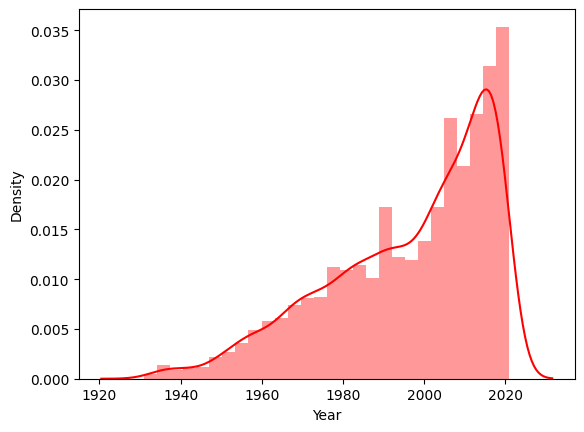

In [270]:
plt.subplot(1,1,1)
sns.distplot(movie_data['Year'],color='r')

<ipython-input-271-95967ee5d029>:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(movie_data['Rating'],color='r')


<Axes: xlabel='Rating', ylabel='Density'>

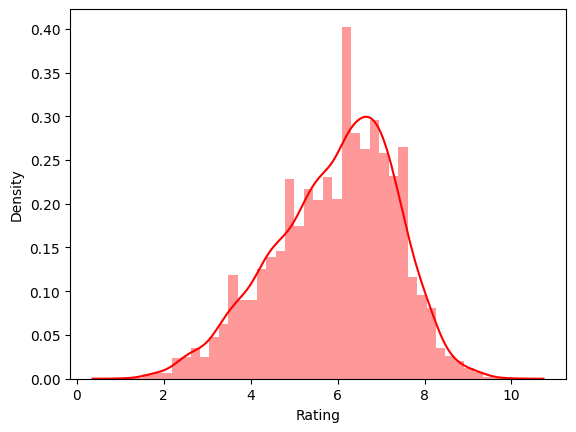

In [271]:
plt.subplot(1,1,1)
sns.distplot(movie_data['Rating'],color='r')

<Axes: xlabel='Duration', ylabel='Rating'>

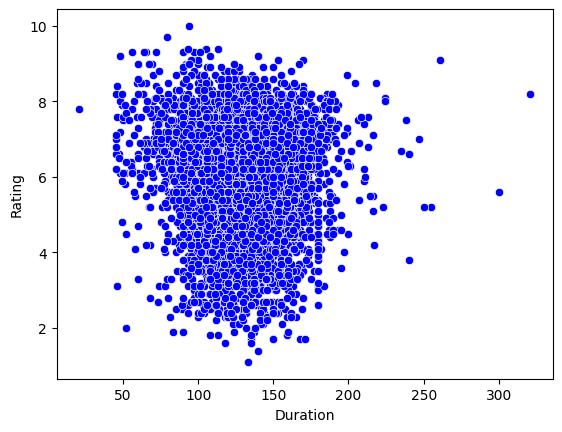

In [272]:
plt.subplot(1,1,1)
sns.scatterplot(x = movie_data['Duration'],y = movie_data['Rating'],data=movie_data,color='b')

array([[<Axes: title={'center': 'Year'}>,
        <Axes: title={'center': 'Duration'}>],
       [<Axes: title={'center': 'Rating'}>,
        <Axes: title={'center': 'Votes'}>]], dtype=object)

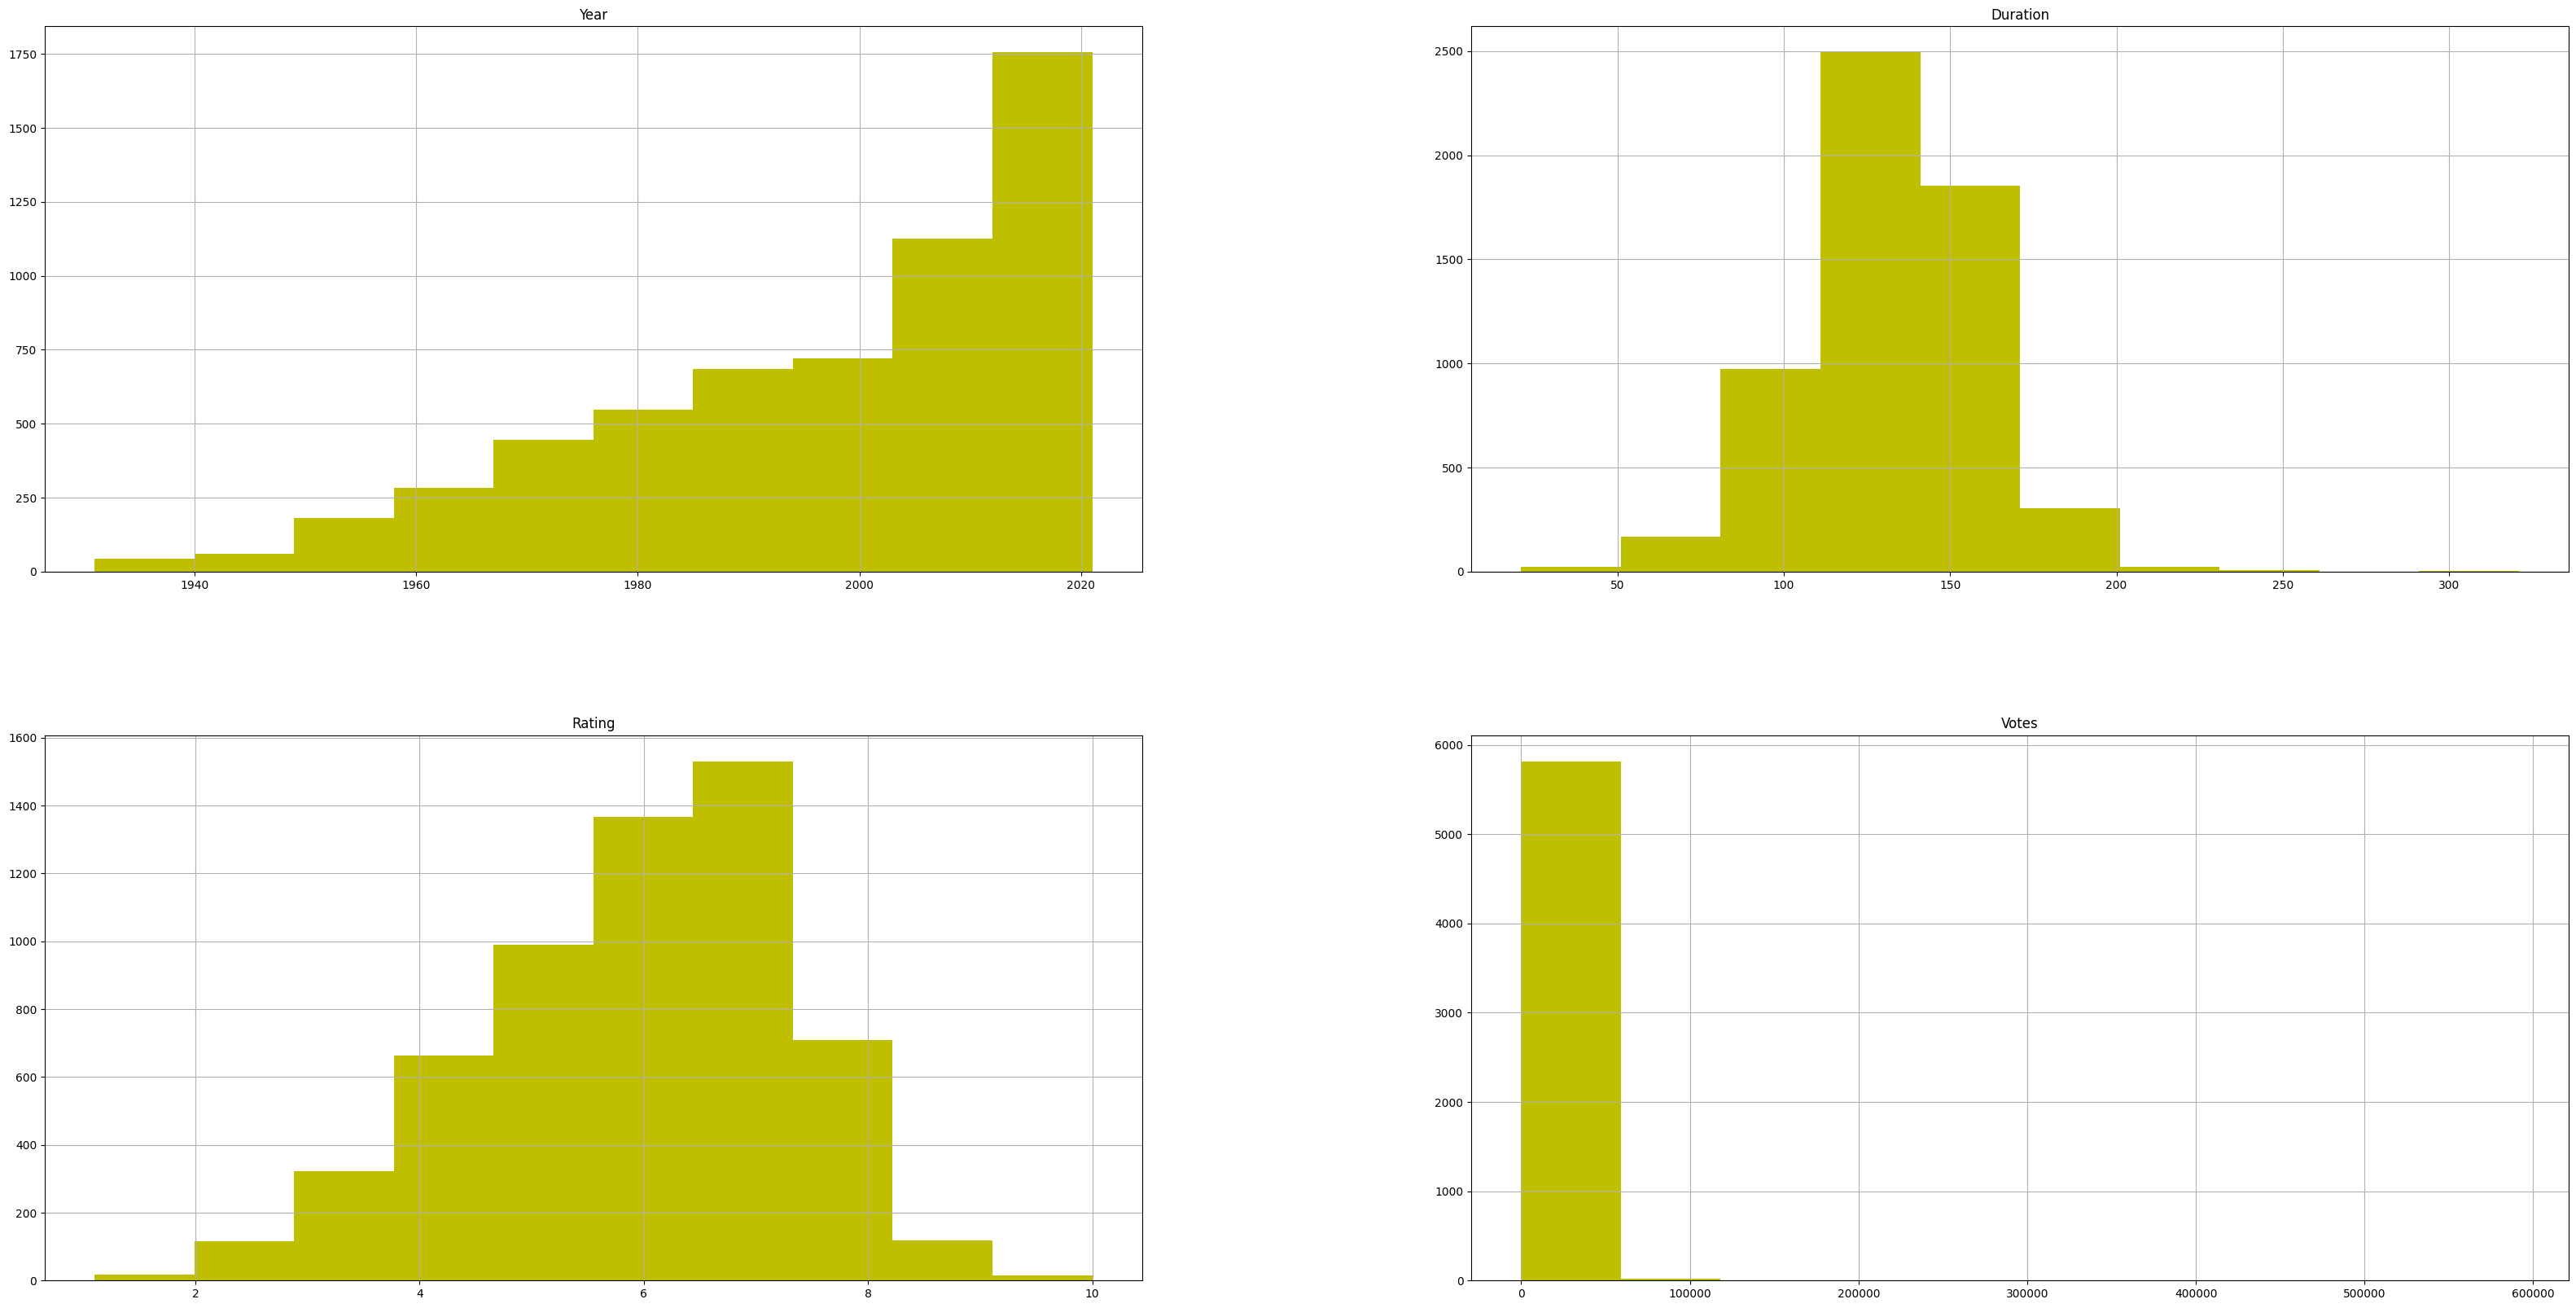

In [273]:
movie_data.hist(figsize=(40,20),color='y')

In [274]:
heatmat = movie_data.corr()

<ipython-input-274-e16fa571cdb8>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  heatmat = movie_data.corr()


In [275]:
fig = plt.figure(figsize = (30,10))

<Figure size 3000x1000 with 0 Axes>

<Axes: >

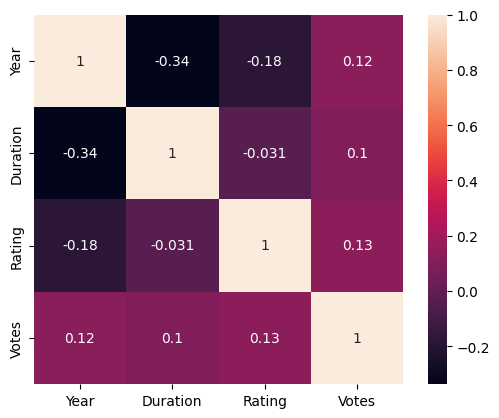

In [276]:
sns.heatmap(heatmat, vmax= 1,square = True, annot = True)

In [277]:
movie_data.head()

,Name,Year,Duration,Rating,Votes,Director,Actor 1,Actor 2,Actor 3
1,#Gadhvi (He thought he was Gandhi),2019,109,7.0,8,Gaurav Bakshi,Rasika Dugal,Vivek Ghamande,Arvind Jangid
3,#Yaaram,2019,110,4.4,35,Ovais Khan,Prateik,Ishita Raj,Siddhant Kapoor
5,...Aur Pyaar Ho Gaya,1997,147,4.7,827,Rahul Rawail,Bobby Deol,Aishwarya Rai Bachchan,Shammi Kapoor
6,...Yahaan,2005,142,7.4,1086,Shoojit Sircar,Jimmy Sheirgill,Minissha Lamba,Yashpal Sharma
8,?: A Question Mark,2012,82,5.6,326,Allyson Patel,Yash Dave,Muntazir Ahmad,Kiran Bhatia


Feature Extraction

In [278]:
movie_data.drop(['Name','Director','Actor 1','Actor 2','Actor 3'], axis = 1, inplace=True)

In [279]:
movie_data.head()

,Year,Duration,Rating,Votes
1,2019,109,7.0,8
3,2019,110,4.4,35
5,1997,147,4.7,827
6,2005,142,7.4,1086
8,2012,82,5.6,326


In [280]:
X = movie_data[['Year','Duration', 'Votes']]
Y = movie_data['Rating']

In [303]:
print(X)

       Year  Duration  Votes
1      2019       109      8
3      2019       110     35
5      1997       147    827
6      2005       142   1086
8      2012        82    326
...     ...       ...    ...
15493  2015       115    408
15494  2001       153   1496
15503  1989       125     44
15505  1999       129    655
15508  1998       130     20

[5851 rows x 3 columns]


In [304]:
print(Y)

1        7.0
3        4.4
5        4.7
6        7.4
8        5.6
        ... 
15493    6.1
15494    6.2
15503    5.8
15505    4.5
15508    6.2
Name: Rating, Length: 5851, dtype: float64


In [327]:
X_train , X_test, Y_train, Y_test = train_test_split( X, Y , test_size = 0.2, random_state = 1000)

Modal Making

In [315]:
print( X.shape, X_train.shape, X_test.shape)

(5851, 3) (4680, 3) (1171, 3)


In [318]:
data_pipeline = Pipeline([
    ('scaler', StandardScaler()),
    ('sgd', SGDRegressor(max_iter=10000, random_state=1000))
])

In [320]:
data_pipeline.fit(X_train, Y_train)

Pipeline(steps=[('scaler', StandardScaler()),
                ('sgd', SGDRegressor(max_iter=10000, random_state=1000))])

In [321]:
Y_predict_pipeline = data_pipeline.predict(X_test)

Evaluatiing the model

In [325]:
mae_pl1 = mean_absolute_error(Y_test, Y_predict_pipeline)
mse_pl2 = mean_squared_error(Y_test, Y_predict_pipeline)
r2_pl = r2_score(Y_test, Y_predict_pipeline)

In [328]:
print("mean_absolute_Error:",mae_pl1)
print("mean_Square_Error:",mse_pl2)
print("R_Square:",r2_pl)

mean_absolute_Error: 1.042167187095614
mean_Square_Error: 1.6669609945740687
R_Square: 0.06862437050461812


Developing the model

In [332]:
New_I = pd.DataFrame({
    'Year':[2022],
    'Duration':[120],
    'Votes':[10000]
})

In [333]:
predicted_rating = data_pipeline.predict(New_I)

In [334]:
print("Predicted Rating:",predicted_rating)

Predicted Rating: [5.64781779]
